## This Script contains the folowing:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook.

%matplotlib inline

In [3]:
#Creating directory path
path = r'C:\Users\luke_\Documents\FinalProject\02_data'

In [4]:
#This data has not had the outliers removed
df = pd.read_csv(os.path.join(path, 'prepared_data', 'happiness_checked.csv'))

### 2. Data Cleaning

In [5]:
df.columns

Index(['year', 'rank', 'country_name', 'region', 'happiness_score',
       'gdp/capita', 'social_support', 'life_expectancy', 'freedom_of_choice',
       'generosity', 'perceived_corruption'],
      dtype='object')

In [6]:
df.head()

,year,rank,country_name,region,happiness_score,gdp/capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
0,2024,1,Finland,Europe and Central Asia,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,2024,2,Denmark,Europe and Central Asia,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,2024,3,Iceland,Europe and Central Asia,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,2024,4,Sweden,Europe and Central Asia,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,2024,5,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [7]:
df.shape

(1497, 11)

Check for missing values

In [8]:
df.isnull().sum()
#There are no missing values

year                    0
rank                    0
country_name            0
region                  0
happiness_score         0
gdp/capita              0
social_support          0
life_expectancy         0
freedom_of_choice       0
generosity              0
perceived_corruption    0
dtype: int64

Duplicates

In [9]:
dups = df.duplicated()

In [10]:
dups.shape
#There are no duplicates

(1497,)

Checking for outliers

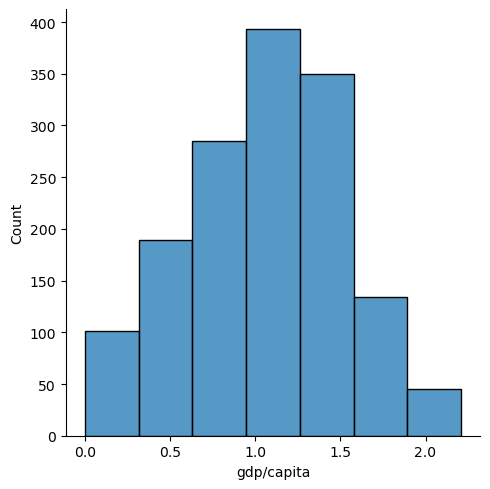

In [11]:
sns.displot(df['gdp/capita'], bins=7)
plt.show() # Shows extreme values

In [12]:
#Check the mean
df['gdp/capita'].mean()

1.056569806279225

In [13]:
#Check the median
df['gdp/capita'].median()

1.074

In [14]:
#check the max
df['gdp/capita'].max()

2.209

### 3. Data prep for regression analysis

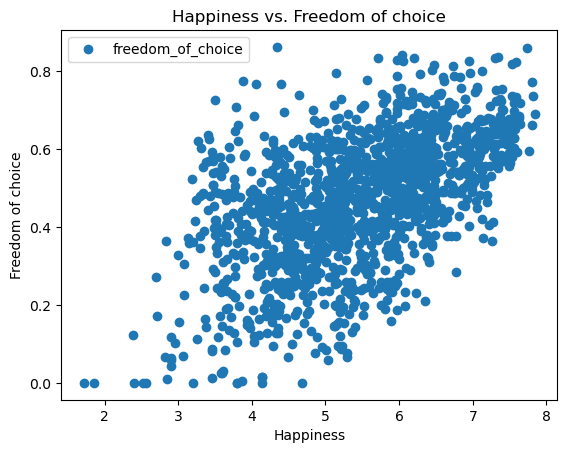

In [15]:
# Create a scatterplot using matplotlib.

df.plot(x = 'happiness_score', y= 'freedom_of_choice',style='o') # The style option creates a scatterplot.
plt.title('Happiness vs. Freedom of choice')  
plt.xlabel('Happiness')  
plt.ylabel('Freedom of choice')  
plt.show()

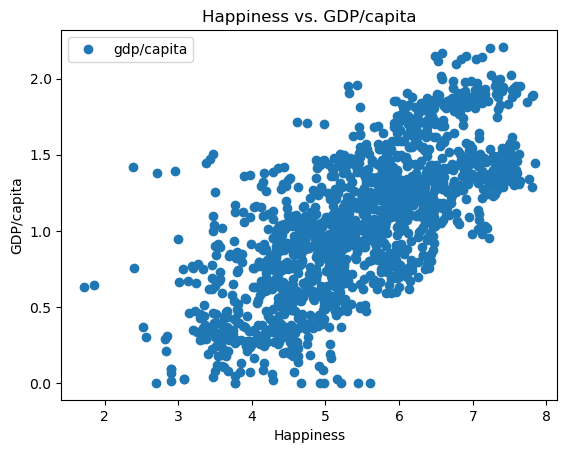

In [17]:
# Create a scatterplot using matplotlib.

df.plot(x = 'happiness_score', y='gdp/capita',style='o') # The style option creates a scatterplot.
plt.title('Happiness vs. GDP/capita')  
plt.xlabel('Happiness')  
plt.ylabel('GDP/capita')  
plt.show()

#### My Hypothesis assumes that there are multiple variables which make up a high Happiness Score. From the data, we see that the GDP per Capita has the highest correlation. I would like to examine if there is a point of deminishing return, or if there might be other interesting aspects of the correlation we can observe through a regression.

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['happiness_score'].values.reshape(-1,1)
y = df['gdp/capita'].values.reshape(-1,1)

In [19]:
X

array([[7.741],
       [7.583],
       [7.525],
       ...,
       [3.006],
       [2.905],
       [2.839]])

In [20]:
y

array([[1.844],
       [1.908],
       [1.881],
       ...,
       [0.663],
       [0.015],
       [0.209]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

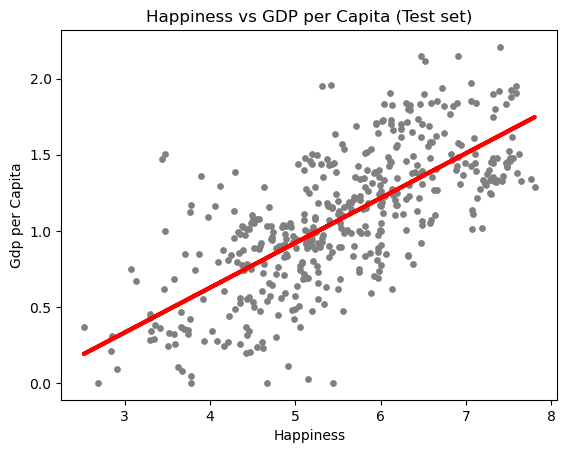

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness vs GDP per Capita (Test set)')
plot_test.xlabel('Happiness')
plot_test.ylabel('Gdp per Capita')
plot_test.show()

#### Positive Correlation: The upward slope of the red line suggests a positive correlation between Happiness and Freedom of Choice. This means that, on average, as happiness increases, so does the perception of freedom of choice.
#### Variability: The data points are spread around the line, showing a considerable amount of scatter. This indicates that while there is a positive trend, there is also significant variability. Not every increase in happiness directly corresponds to a proportionate increase in freedom of choice, but the overall trend is positive.
#### Strength of the Correlation: The scatter around the red line suggests a moderate correlation. If the points were closer to the line, it would indicate a stronger relationship; since they are dispersed, the correlation might not be very strong, though it is positive.

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29451419]]
Mean squared error:  0.10256350777312258
R2 score:  0.5044699076477728


In [28]:
y_predicted

array([[0.90931826],
       [1.04567833],
       [1.53604446],
       [1.22385941],
       [1.04773993],
       [1.28541288],
       [1.11282756],
       [1.35963046],
       [1.54016766],
       [0.98972063],
       [0.5491274 ],
       [1.52632549],
       [1.40586918],
       [1.33930898],
       [1.09810185],
       [0.57268854],
       [1.25537243],
       [1.55813302],
       [0.55619574],
       [1.2070721 ],
       [1.57786547],
       [0.55707929],
       [0.71876758],
       [1.0763078 ],
       [1.62263163],
       [1.10575922],
       [1.38702028],
       [1.62852191],
       [0.80152606],
       [1.74780016],
       [1.13786127],
       [1.26744751],
       [0.53528524],
       [0.95673504],
       [0.43750652],
       [0.67547399],
       [1.48332642],
       [1.25743403],
       [1.16142241],
       [1.25183826],
       [0.91933174],
       [0.99885057],
       [0.95938567],
       [0.73555489],
       [1.02918553],
       [1.08160906],
       [1.38024645],
       [1.217

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.480,0.909318
1,1.957,1.045678
2,1.609,1.536044
3,1.728,1.223859
4,1.155,1.047740
5,1.617,1.285413
6,0.983,1.112828
7,1.375,1.359630
8,1.508,1.540168
9,1.094,0.989721


In [30]:
# Compare how the regression fits the training set
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29451419]]
Mean squared error:  0.10478480900718941
R2 score:  0.5092730631183342


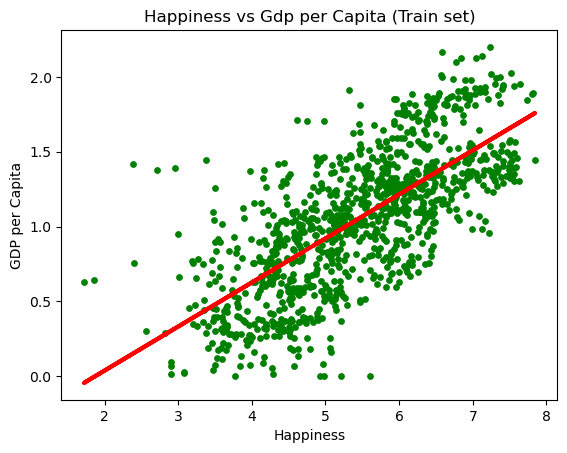

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness vs Gdp per Capita (Train set)')
plot_test.xlabel('Happiness')
plot_test.ylabel('GDP per Capita')
plot_test.show()

### Test Set
#### Slope: [[0.29451419]]
#### Mean squared error:  0.10256350777312258
#### R2 score:  0.5044699076477728

### Train set:-  
#### Slope: [[0.29451419]]
#### Mean squared error:  0.10478480900718941
#### R2 score:  0.5092730631183342

#### Slope: The slope is the same in both models, indicating that for both, the rate of change in the dependent variable (GDP) concerning the independent variable (Happiness) is identical.

#### Mean Squared Error: The training set presents slightly better predictions on average, as indicated by the marginally lower error.

#### R2 Score: The scores of around 0.504 and 0.509 suggest that only about 50% to 51% of the variability in GDP per Capita can be explained by happiness alone. This reinforces our Hypothesis that GDP alone is not the only indicator of a Happiness score.